## ------ Data Science Lifecycle -------

- Step 1: Data Loading
- Step 2: Exploratory Data Analysis
- Step 3: Data Preprocessing

## >>>> Case Study: Insurance Medical Cost Prediction <<<<

**Objective:**

In this exercise, you will explore a dataset of insurance data detailed below. We will build a model to predict the cost of treatment for individuals based on their age, sex, bmi and other information.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

## ======= STEP 1: DATA LOADING ========

#### Import Necessary Python Modules:

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load The Data:

In [2]:
data = pd.read_csv(r"D:\0. DATA Science\MA in Data Science\Class Lessons\1. [Module 1] -- PRE PROGRAM CONTENT --- Python - [Jan 4 - Mar 19] - 2023\00. Portfolio Files\Python Insurance Medical Cost Prediction Project\Insurance Medical Cost Prediction Dataset.csv")

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Read & Visualize Data:

Data now is stored on disk in a csv (Comma Separated Values) file. To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function.

## ======= STEP 2: EXPLORATORY DATA ANALYSIS (EDA) ========

**Task:** how many rows & columns in our dataset

In [4]:
data.shape

(1338, 7)

In [5]:
rows = data.shape[0]
columns = data.shape[1]

print("There are {} rows and {} columns".format(rows,columns))

There are 1338 rows and 7 columns


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Distribution of Charges:

First, let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Correlation between smoking and cost of treatment

Let's see if smokers spend more or less on treatment than non-smokers!

First, let's see how many smokers vs non-smokers we have.

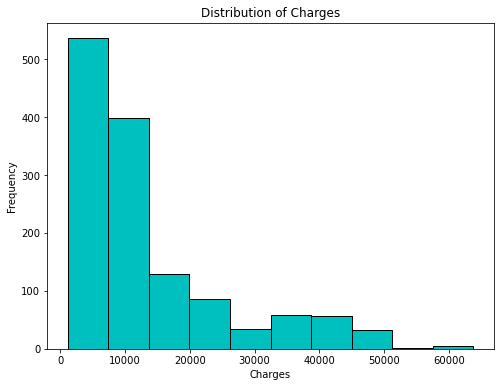

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(data["charges"], color='c', edgecolor='black')

plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")

plt.show()

Smoking patients spend more on treatment.

#### Correlation Between Age and Cost of Treatment

First, let's look at the distribution of age in our dataset, and then look at how age affects the cost of treatment.

In [11]:
#Select Smokers#
smokers = data[(data.smoker == "yes")]

#Select Nom-Smokers#
non_smokers = data[(data.smoker == "no")]

print("There are {} smokers and {} non-smokers.".format(smokers.shape[0], non_smokers.shape[0]))

There are 274 smokers and 1064 non-smokers.


Now, let's plot the charges for both.

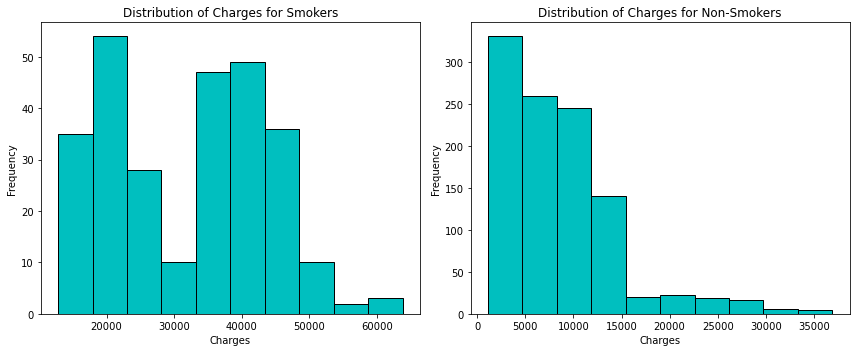

In [14]:
# Create the Figure
fig = plt.figure(figsize=(12, 5))

# Add first sub-plot for smokers
ax1 = fig.add_subplot(121)
# Draw distribution of charges for smokers
ax1.hist(smokers["charges"], color='c', edgecolor='black')
# Set sub-plot title
ax1.set_title("Distribution of Charges for Smokers")
ax1.set_xlabel("Charges")
ax1.set_ylabel("Frequency")


# Add second sub-plot for non-smokers
ax2 = fig.add_subplot(122)
# Draw distribution of charges for non-smokers
ax2.hist(non_smokers["charges"], color='c', edgecolor='black')
# Set sub-plot title
ax2.set_title("Distribution of Charges for Non-Smokers")
ax2.set_xlabel("Charges")
ax2.set_ylabel("Frequency")


# Show the plots
plt.tight_layout()
plt.show()

Smoking patients spend more on treatment.

First, let's look at the distribution of age in our dataset, and then look at how age affects the cost of treatment.

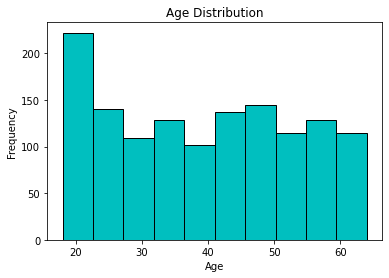

In [16]:
#plot histogram for age distribution#

plt.hist(data["age"], color='c', edgecolor='black')
plt.title("Age Distribution")

plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

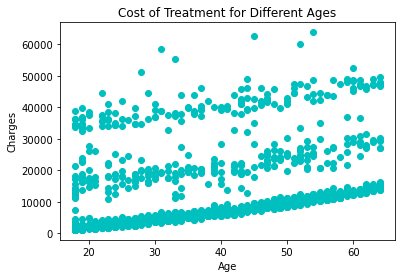

In [17]:
#Draw a scatter plot to show correlation between age and charges#


plt.scatter(data["age"], data["charges"], color='c')
plt.title("Cost of Treatment for Different Ages")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


Let's check if smoking also affects this curve.

**Task**: show a scatter plot with the correlation between age and cost of treatment while showing smokers in red and non-smokers in blue

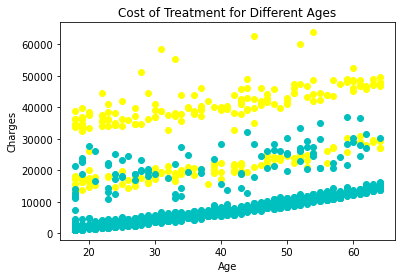

In [48]:
plt.scatter(smokers["age"], smokers["charges"], color="yellow")
plt.scatter(non_smokers["age"], non_smokers["charges"], color="c")

plt.title("Cost of Treatment for Different Ages")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

## Correlation Between BMI and Cost of Treatment --

### Body Mass Index:

<img src="https://4.bp.blogspot.com/-nBF9Z1tFGhI/W3MqbdD0j7I/AAAAAAAAAIs/UdyXTIxsBT8Pl8usABxEK_Fusj5S0SnBQCLcBGAs/s1600/HOW%2BTO%2BCALCULATE%2BBODY%2BMASS%2BINDEX%2BBMI.jpg" alt="Body Mass Index" width="300"/>

### BMI Chart:

<img src="https://images.squarespace-cdn.com/content/v1/56fae4be1d07c0c393d8faa5/1551103826935-HCXS8U78500C06GQ1PLJ/ke17ZwdGBToddI8pDm48kNMeyc_nGAbaGjp3EBJ2o08UqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKckzCNDuUMr1wTvf7-fqd2hrX5O2-_PoO3UJ2jNU1VzJbe6G9-F0r9BTATNUu-NBMy/BMI+Chart.jpg" alt="BMI Chart" width="700"/>

First, let's look at the distribution of BMI in our dataset, and then look at how it affects the cost of treatment.


In [38]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


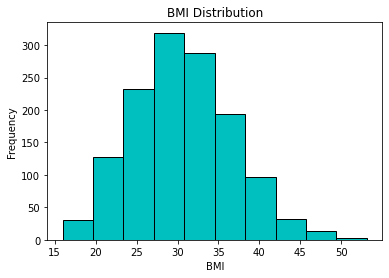

In [39]:
#Draw a histogram to show the distribution of BMI#


plt.hist(data["bmi"], color='c', edgecolor='black')

plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.show()

According to the chart above, obesity starts at BMI = 30. Let's investigate the impact of BMI on cost of treatment. 

In [40]:
#Select Obese People#
obese = data[(data["bmi"] >= 30)]


#Select Overweight People#
overweight = data[(data["bmi"] < 30)]

#Select Healthy People#
healthy = data[(data["bmi"] >= 18)]

#Select Underweight People#
underweight = data[(data["bmi"] < 18)]


print("There are {} obese, {} overweight, {} healthy, and {} underweight individuals.".format(obese.shape[0], overweight.shape[0], healthy.shape[0], underweight.shape[0]))

There are 705 obese, 630 overweight, 1320 healthy, and 15 underweight individuals.


To compare, let's plot the distribution of charges for all 3 groups (obese, overweight and healthy) in 1 plot, while showing `obese` data in red, `overweight` data in yellow and `healthy` data in green.

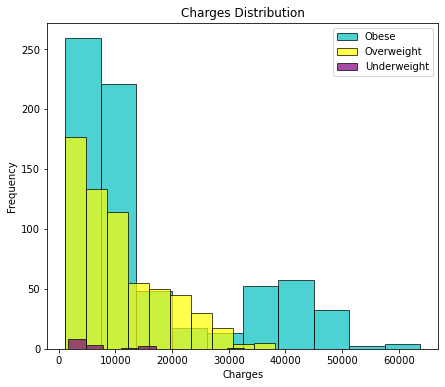

In [46]:
fig = plt.figure(figsize=(7, 6))

# Plot histograms with complementary colors
plt.hist(obese["charges"], color='c', edgecolor='black', alpha=0.7, label='Obese')
plt.hist(overweight["charges"], color='yellow', edgecolor='black', alpha=0.7, label='Overweight')
plt.hist(underweight["charges"], color='purple', edgecolor='black', alpha=0.7, label='Underweight')

plt.title("Charges Distribution")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.legend(loc='upper right')

plt.show()


## ======= STEP 3: DATA PREPROCESSING =======

"Garbage in, garbage out". 

Data should be preprocessed and cleaned to get rid of noisy data. 
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)
 
 
 
 Let's start by removing missing data.

In [22]:
#Print how many missing values in the column#

data.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
#Drop rows with missing values#

data = data.dropna()
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


#### Remove Unused Columns

Let's remove the `region` column since we don't really care about it

In [26]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
#Drop the region feature#

data.drop("region", axis=1, inplace=True)
data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


#### Convert Categorical Columns into Numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 73.0+ KB


In [29]:
#Define dictionary
gender = {"male":0, "female":1}

#Replace sex column with 0/1
data["sex"] = data["sex"].apply(lambda x: gender[x])

#Print head to verify
data.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,yes,16884.92400
1,18,0,33.770,1,no,1725.55230
2,28,0,33.000,3,no,4449.46200
3,33,0,22.705,0,no,21984.47061
4,32,0,28.880,0,no,3866.85520


And now, the smokers column --

In [30]:
#Define dictionary
smokers = {"no":0, "yes":1}

#Replace smokers column with 0/1
data["smoker"] = data["smoker"].apply(lambda x: smokers[x])

#Print head to verify
data.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


#### Normalization:

Let's scale all the columns by dividing by the maximum

In [31]:
#Get the Max of the each column#

data_max = data.max()
data_max

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
charges     63770.42801
dtype: float64

In [32]:
#Devide each column by its maximum value#

data = data.divide(data_max)
data.describe()

,age,sex,bmi,children,smoker,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,0.612441,0.495131,0.577102,0.219476,0.205243,0.208299
std,0.219491,0.500164,0.114832,0.241145,0.404031,0.190041
min,0.281250,0.000000,0.300395,0.000000,0.000000,0.017592
25%,0.421875,0.000000,0.495059,0.000000,0.000000,0.074365
50%,0.609375,0.000000,0.572181,0.200000,0.000000,0.147187
75%,0.796875,1.000000,0.652880,0.400000,0.000000,0.262144
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
